In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import searchnets

In [2]:
ROOT = Path('~/Documents/repos/coding/l2m/visual-search-nets')
ROOT = ROOT.expanduser()
DATA_DIR = ROOT.joinpath('data')
CSV_DIR = DATA_DIR.joinpath('visual_search_stimuli')
RESULTS_DIR = DATA_DIR.joinpath('results')

In [3]:
pal = sns.color_palette("Paired")

In [4]:
cmaps = {
    'alexnet': {
        'transfer': {
            'unit_both': pal[0],
            'mn_both': pal[1],
        },
        'initialize': {
            'unit_both': pal[2],
            'mn_both': pal[3],            
        }
    },
    'CORnet_Z': {
        'transfer': {
            'unit_both': pal[4],
            'mn_both': pal[5],
        },
        'initialize': {
            'unit_both': pal[6],
            'mn_both': pal[7],            
        }
    }
}

In [5]:
net_name = 'alexnet'
method = 'transfer'
learning_rate = 1e-03

datasets = [
    '12000samples',
    '12800samples_balanced',
    '3200samples_setsize1',
]

In [6]:
df_2_v_5_dict = {}

stim_abbrev = '2_v_5'
for dataset in datasets:
    data_csv_path = CSV_DIR.joinpath(
        f'{net_name}_{stim_abbrev}_{dataset}_split.csv')
    results_gz_path = RESULTS_DIR.joinpath(
        f'{net_name}_{method}_lr_1e-03_no_finetune_{stim_abbrev}_{dataset}/'
        f'searchnets_{net_name}_{method}_lr_1e-03_no_finetune_{stim_abbrev}_{dataset}_'
        'trained_200_epochs_test_results.gz')

    df_2_v_5_dict[dataset] = searchnets.utils.general.results_df(
        data_csv_path, results_gz_path, net_name, method, learning_rate
    )

/home/ildefonso/Documents/repos/coding/l2m/visual-search-nets/src/searchnets/utils/general.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testset['y_true'] = df_testset['target_condition'] == 'present'
/home/ildefonso/Documents/repos/coding/l2m/visual-search-nets/src/searchnets/utils/general.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testset['y_pred'] = preds_per_model[key]
/home/ildefonso/Documents/repos/coding/l2m/visual-search-nets/src/searchnets/utils/metrics.py:15: RuntimeWarning:

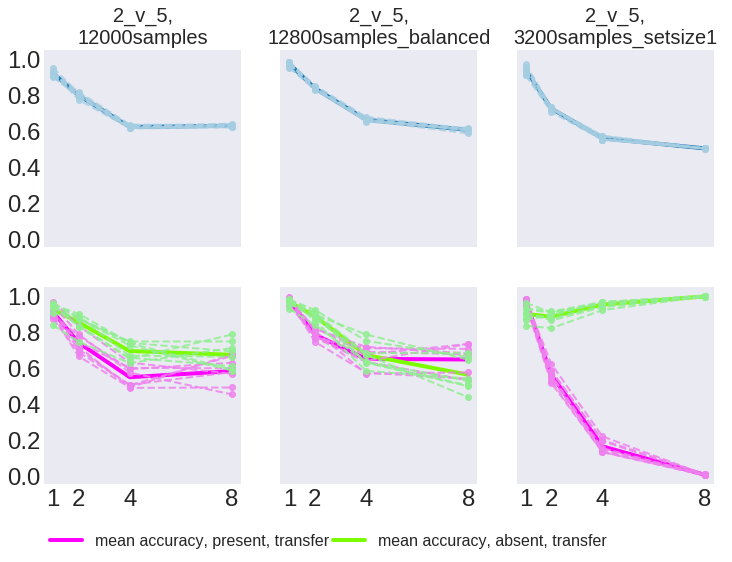

In [7]:
figsize=(12, 8)
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=figsize)

FONTSIZE = 24
for axis in ax.ravel():
    for item in ([axis.title, axis.xaxis.label, axis.yaxis.label] +
                 axis.get_xticklabels() + axis.get_yticklabels()):
        item.set_fontsize(FONTSIZE)

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

add_legend = False

stim_abbrev = '2_v_5'

for col, dataset in enumerate(datasets):
        unit_colors = {'both': cmaps[net_name][method]['unit_both']}
        mn_colors = {'both': cmaps[net_name][method]['mn_both']}

        df = df_2_v_5_dict[dataset]

        searchnets.plot.metric_v_set_size_df(df=df, 
                                             net_name=net_name,
                                             method=method, 
                                             stimulus=stim_abbrev,
                                             metric='accuracy', 
                                             conditions=['both'],
                                             unit_colors=unit_colors,
                                             mn_colors=mn_colors,
                                             set_ylim=False,
                                             ax=ax[0, col],
                                             ylim=(0.5, 1.05),
                                             add_legend=add_legend)
        ax[0, col].set_title(stim_abbrev + ',\n' + dataset)

        searchnets.plot.metric_v_set_size_df(df=df, 
                                             net_name=net_name,
                                             method=method, 
                                             stimulus=stim_abbrev,
                                             metric='accuracy', 
                                             conditions=['present', 'absent'],
                                             set_ylim=False,
                                             ax=ax[1, col],
                                             ylim=(0.3, 1.05),
                                             add_legend=add_legend)

handles, labels = ax[1, 0].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(0., -0.2, 0.85, .102), loc='upper left',
           ncol=2, mode="expand", borderaxespad=0., fontsize=16);

#savepath = ROOT.joinpath('docs/sfn19/searchstims_alexnet_transfer_initialize_120000samples.png')            
#plt.savefig(savepath, bbox_inches="tight")

There are two ways in which the composition of the training set might bias accuracy as measured on the test set. The first and most intuitive to understand is that the stimuli only ever contain one target but can contain up to eight distractor, and so the network will see many more distractors during training, even when the training set is balanced so that there are equal numbers of samples for each visual search set size. The second way the training set might bias accuracy is that for larger visual search set sizes there is a combinatorial explosion of possible placements of distractors.
The above tests how the composition of the training set affects accuracy measured on the test set for the 2 v. 5 visual search stimulus. We chose this stimulus becuase for all models it produced the greatest impairment in accuracy as the number of distractors increased. In the left panel, the training set contained an incraesing number of samples for each visual search set size, i.e. [800, 1600, 3200, 6400] samples respectively for set sizes [1, 2, 4, 8]. In the middle panel, the training set contained 3200 samples for each set size. Lastly in the right panel, the training set consisted of stimuli with visual search set size 1, so that the network saw the exact same number of targets and distractors.
We noted the following: for the left panel, accuracy was always higher for the target absent condition. This suggests that the bias did not protect 

In [14]:
data_csv_path

PosixPath('/home/ildefonso/Documents/repositories/coding/L2M/visual-search-nets/data/visual_search_stimuli/alexnet_2_v_5_12000samples_split.csv')

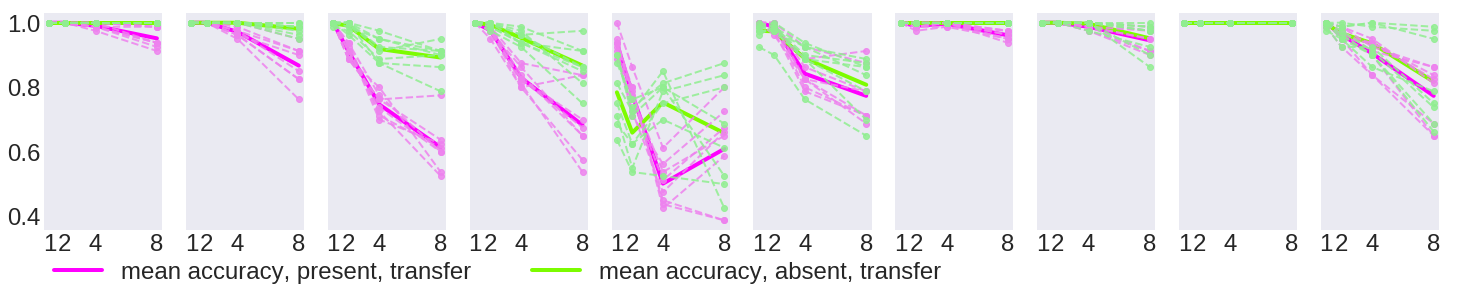

In [13]:
figsize=(25,4)
fig, ax = plt.subplots(1, 10, sharex=True, sharey=True, figsize=figsize)

FONTSIZE = 24
for axis in ax:
    for item in ([axis.title, axis.xaxis.label, axis.yaxis.label] +
                 axis.get_xticklabels() + axis.get_yticklabels()):
        item.set_fontsize(FONTSIZE)

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

add_legend = False
method = 'transfer'

for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'],
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'])):
        unit_colors = {'both': cmaps[net_name][method]['unit_both']}
        mn_colors = {'both': cmaps[net_name][method]['mn_both']}

        searchnets.plot.metric_v_set_size_df(df=df_alexnet, 
                                             net_name='alexnet',
                                             method=method, 
                                             stimulus=stim_abbrev,
                                             metric='accuracy', 
                                             conditions=['present', 'absent'],
                                             set_ylim=False,
                                             ax=ax[col],
                                             ylim=(0.5, 1.05),
                                             add_legend=add_legend)

handles, labels = ax[0].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(0., -0.2, 0.65, .102), loc='upper left',
           ncol=2, mode="expand", borderaxespad=0., fontsize=FONTSIZE);

savepath = ROOT.joinpath('docs/sfn19/searchstims_alexnet_transfer_initialize_120000samples_mean_acc_present_absent.png')            
plt.savefig(savepath, bbox_inches="tight")

In [15]:
df_list = []

net_name = 'CORnet_Z'
for method in ['initialize', 'transfer']:
    if method == 'transfer':
        results_gz_path = DATA_DIR.joinpath('results/CORnet_Z_transfer_lr_1e-03_no_finetune_multiple_stims_120000samples/searchnets_CORnet_Z_transfer_lr_1e-03_no_finetune_multiple_stims_120000samples_trained_200_epochs_test_results.gz')
    elif method == 'initialize':
        results_gz_path = DATA_DIR.joinpath('results/CORnet_Z_initialize_lr_1e-03_multiple_stims_120000samples/searchnets_CORnet_Z_initialize_lr_1e-03_multiple_stims_120000samples_trained_200_epochs_test_results.gz')
    df_list.append(
        searchnets.utils.general.results_df(data_csv_path, results_gz_path, net_name, method, learning_rate)
    )

df_CORnet_Z = pd.concat(df_list)

/home/ildefonso/Documents/repositories/coding/L2M/visual-search-nets/src/searchnets/utils/general.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testset['y_true'] = df_testset['target_condition'] == 'present'
/home/ildefonso/Documents/repositories/coding/L2M/visual-search-nets/src/searchnets/utils/general.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_testset['y_pred'] = preds_per_model[key]
/home/ildefonso/Documents/repositories/coding/L2M/visual-search-nets/src/searchnets/utils/metrics.p

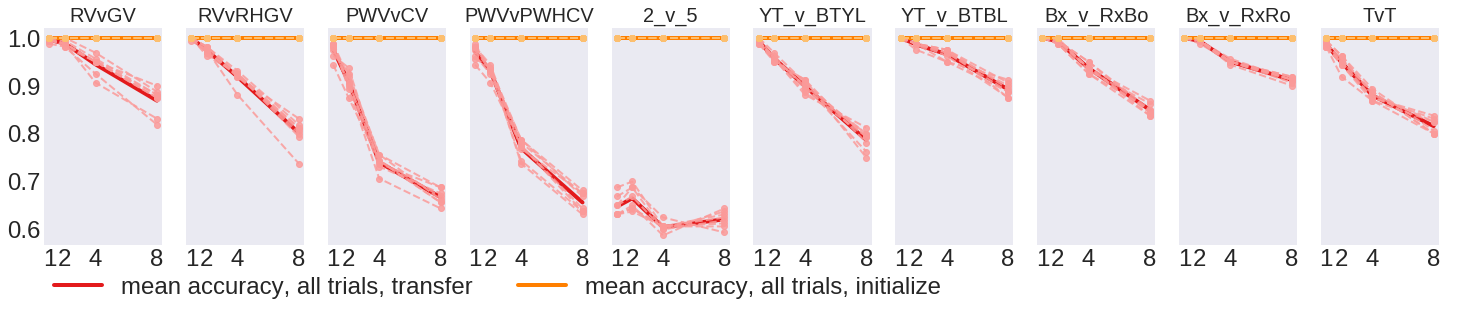

In [16]:
figsize=(25,4)
fig, ax = plt.subplots(1, 10, sharex=True, sharey=True, figsize=figsize)

FONTSIZE = 24
for axis in ax:
    for item in ([axis.title, axis.xaxis.label, axis.yaxis.label] +
                 axis.get_xticklabels() + axis.get_yticklabels()):
        item.set_fontsize(FONTSIZE)

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

add_legend = False

net_name = 'CORnet_Z'
for method in ['transfer', 'initialize']:
    for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'],
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'])):
            unit_colors = {'both': cmaps[net_name][method]['unit_both']}
            mn_colors = {'both': cmaps[net_name][method]['mn_both']}

            searchnets.plot.metric_v_set_size_df(df=df_CORnet_Z, 
                                                 net_name=net_name,
                                                 method=method, 
                                                 stimulus=stim_abbrev,
                                                 metric='accuracy', 
                                                 conditions=['both'],
                                                 unit_colors=unit_colors,
                                                 mn_colors=mn_colors,
                                                 set_ylim=False,
                                                 ax=ax[col],
                                                 ylim=(0.5, 1.05),
                                                 add_legend=add_legend)
            ax[col].set_title(stim_abbrev)

handles, labels = ax[0].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(0., -0.2, 0.65, .102), loc='upper left',
           ncol=2, mode="expand", borderaxespad=0., fontsize=FONTSIZE);

savepath = ROOT.joinpath('docs/sfn19/searchstims_CORnet_Z_transfer_initialize_120000samples.png')            
plt.savefig(savepath, bbox_inches="tight")

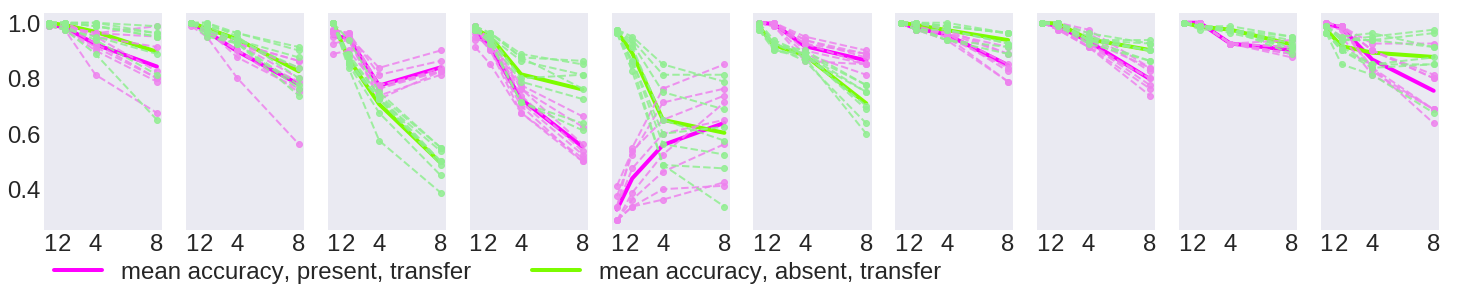

In [17]:
figsize=(25,4)
fig, ax = plt.subplots(1, 10, sharex=True, sharey=True, figsize=figsize)

FONTSIZE = 24
for axis in ax:
    for item in ([axis.title, axis.xaxis.label, axis.yaxis.label] +
                 axis.get_xticklabels() + axis.get_yticklabels()):
        item.set_fontsize(FONTSIZE)

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

add_legend = False
method = 'transfer'

for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'],
        ['RVvGV', 'RVvRHGV', 'PWVvCV', 'PWVvPWHCV', '2_v_5', 'YT_v_BTYL', 'YT_v_BTBL', 'Bx_v_RxBo', 'Bx_v_RxRo', 'TvT'])):
        unit_colors = {'both': cmaps[net_name][method]['unit_both']}
        mn_colors = {'both': cmaps[net_name][method]['mn_both']}

        searchnets.plot.metric_v_set_size_df(df=df_CORnet_Z, 
                                             net_name='CORnet_Z',
                                             method=method, 
                                             stimulus=stim_abbrev,
                                             metric='accuracy', 
                                             conditions=['present', 'absent'],
                                             set_ylim=False,
                                             ax=ax[col],
                                             ylim=(0.5, 1.05),
                                             add_legend=add_legend)

handles, labels = ax[0].get_legend_handles_labels()
plt.legend(handles, labels, bbox_to_anchor=(0., -0.2, 0.65, .102), loc='upper left',
           ncol=2, mode="expand", borderaxespad=0., fontsize=FONTSIZE);

savepath = ROOT.joinpath('docs/sfn19/searchstims_CORnet_Z_transfer_initialize_120000samples_mean_acc_present_absent.png')            
plt.savefig(savepath, bbox_inches="tight")